In [1]:
#HW 0 Create a Post: Palmer Penguins
#Write a tutorial explaining how to construct an interesting data visualization of the Palmer Penguins data set.
import pandas as pd
url = "https://raw.githubusercontent.com/pic16b-ucla/24W/main/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

In [2]:
#explore our df
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [3]:
#check for null values in df
penguins.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [17]:
#we want to drop culmen length and depth null values
penguins = penguins.dropna(subset=['Culmen Length (mm)', 'Culmen Depth (mm)'], axis=0)
penguins.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                      8
Delta 15 N (o/oo)       12
Delta 13 C (o/oo)       11
Comments               317
dtype: int64

In [18]:
#explore Island column
print(penguins['Island'].value_counts())

Island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64


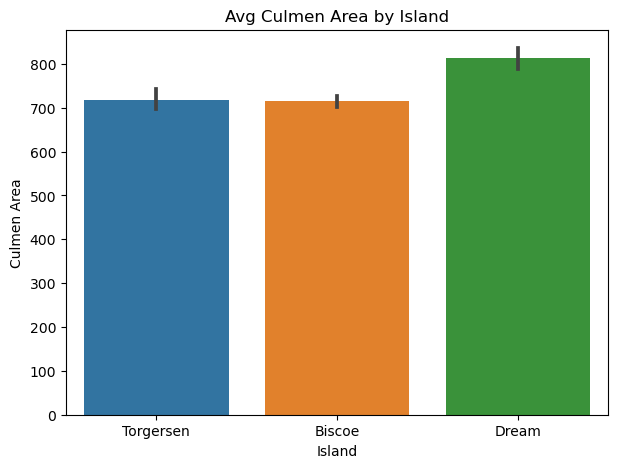

In [20]:
#I want to visualize Culmen area by island
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#make copy of the df, as it is good practice not to alter the primary df
penguinz = penguins.copy()
#create new column 'Culmen_Area' in our copy df by multiplying culmen length and depth
penguinz['Culmen_Area'] = penguinz['Culmen Length (mm)'] * penguinz['Culmen Depth (mm)']
#drop culmen length and depth columns in our copy df, for future uses of the copy df
penguinz = penguinz.drop(columns=(['Culmen Length (mm)', 'Culmen Depth (mm)']))

#barplot that visualizes average culmen area by island
plt.figure(figsize=(7,5))
sns.barplot(x='Island', y='Culmen_Area', data=penguinz, estimator=np.mean)
plt.xlabel('Island')
plt.ylabel('Culmen Area')
plt.title('Avg Culmen Area by Island')
plt.show()